In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
X_train.shape

(784, 41000)

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    result = np.exp(Z)/sum(np.exp(Z))
    return result

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLu(Z):
    return Z > 0 

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("iteration: ", int(i/10))
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2            

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

iteration:  0
[8 9 1 ... 2 0 1] [0 2 9 ... 8 4 0]
Accuracy:  0.08904878048780487
iteration:  1
[8 2 1 ... 2 9 8] [0 2 9 ... 8 4 0]
Accuracy:  0.16504878048780489
iteration:  2
[0 2 7 ... 2 9 8] [0 2 9 ... 8 4 0]
Accuracy:  0.2315609756097561
iteration:  3
[0 2 3 ... 2 9 8] [0 2 9 ... 8 4 0]
Accuracy:  0.2966341463414634
iteration:  4
[0 2 3 ... 2 9 8] [0 2 9 ... 8 4 0]
Accuracy:  0.36353658536585365
iteration:  5
[0 2 3 ... 2 4 8] [0 2 9 ... 8 4 0]
Accuracy:  0.4345609756097561
iteration:  6
[0 2 3 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.4983170731707317
iteration:  7
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.547609756097561
iteration:  8
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.591
iteration:  9
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.6315365853658537
iteration:  10
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.6611463414634147
iteration:  11
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  0.685
iteration:  12
[0 2 7 ... 2 4 0] [0 2 9 ... 8 4 0]
Accuracy:  

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


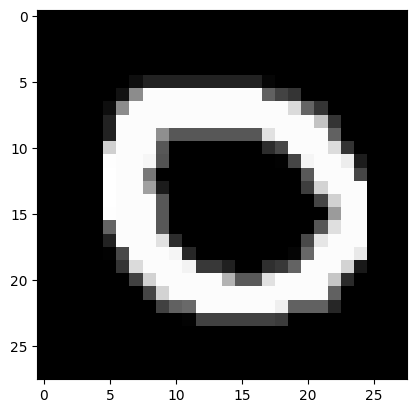

Prediction:  [2]
Label:  2


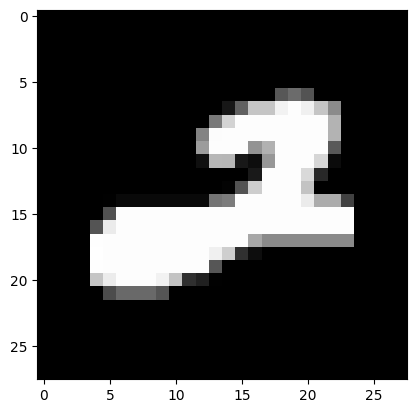

Prediction:  [9]
Label:  9


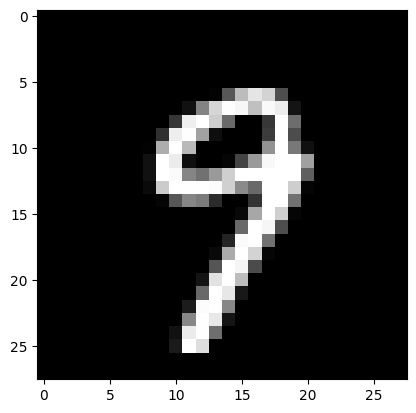

Prediction:  [2]
Label:  2


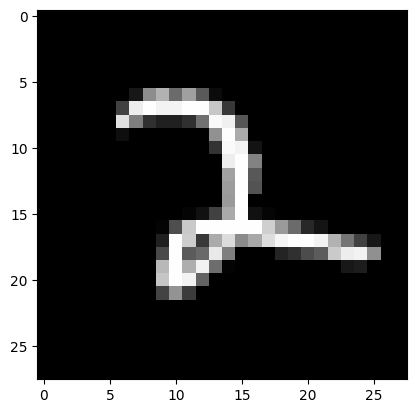

Prediction:  [2]
Label:  2


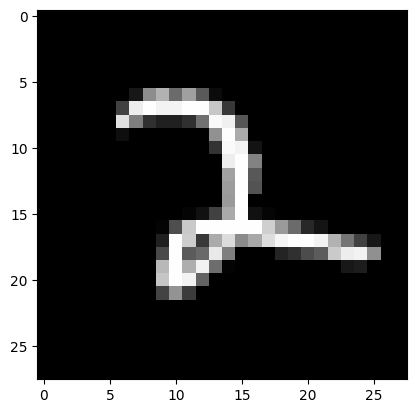

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)